#Context

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam

#Content

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.
<br>
<br>
This corpus has been collected from free or free for research sources at the Internet:
<br>

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages

-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available.

#Libraries

In [147]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

#Data

In [129]:
df = pd.read_csv('spam.csv', delimiter=',',encoding='latin-1') #Call to the data
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True) #Dropping not useable columns
df.sample(10) #random 10 rows

,v1,v2
3967,ham,Did u turn on the heater? The heater was on an...
307,ham,Lol yes. Our friendship is hanging on a thread...
4155,ham,"Yo, call me when you get the chance, a friend ..."
5561,ham,Get me out of this dump heap. My mom decided t...
2808,ham,Oh yeah I forgot. U can only take 2 out shoppi...
3467,ham,yay! finally lol. i missed our cinema trip las...
3379,ham,Just finished. Missing you plenty
975,ham,Hey no I ad a crap nite was borin without ya 2...
3387,ham,Same as kallis dismissial in 2nd test:-).
2998,ham,"Oh, then your phone phoned me but it disconnected"


#Data Analysis

In [130]:
df.info() #Infr of Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#Preprocessing

In [131]:
df["v1"] = (df["v1"] == "spam").astype(int)

In [132]:
x, y=df['v2'].values,df['v1'].values

In [133]:
x = x.tolist()
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(x)

#Splitting

In [134]:
train_x,test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2)

#kNN

In [138]:
knn_model = KNeighborsClassifier()
knn_model.fit(train_x, train_y)

test_pre = knn_model.predict(test_x)

#Results

In [140]:
print(classification_report(test_y, test_pre))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       957
           1       1.00      0.39      0.56       158

    accuracy                           0.91      1115
   macro avg       0.95      0.69      0.75      1115
weighted avg       0.92      0.91      0.90      1115



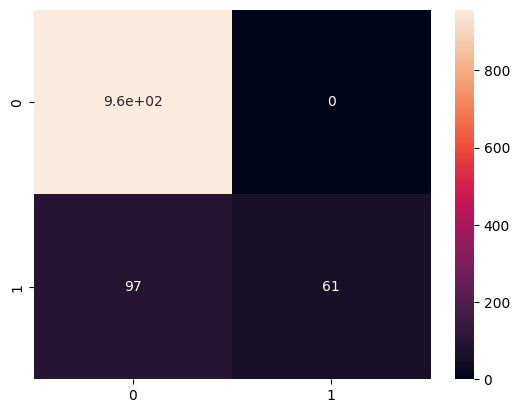

In [149]:
sns.heatmap(confusion_matrix(test_y, test_pre), annot=True)
plt.show()